In [1]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns

import scipy.stats as stats
from scipy.stats import chi2_contingency

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [2]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
female=data.loc[data.sex=="female"]
male=data.loc[data.sex=="male"]

In [6]:
f_bmi = female.bmi
m_bmi = male.bmi

C:\Users\User\AppData\Local\Temp\ipykernel_4488\1994206226.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(f_bmi,color='green',hist=False)
C:\Users\User\AppData\Local\Temp\ipykernel_4488\1994206226.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(m_bmi,color='red',hist=F

<AxesSubplot: xlabel='bmi', ylabel='Density'>

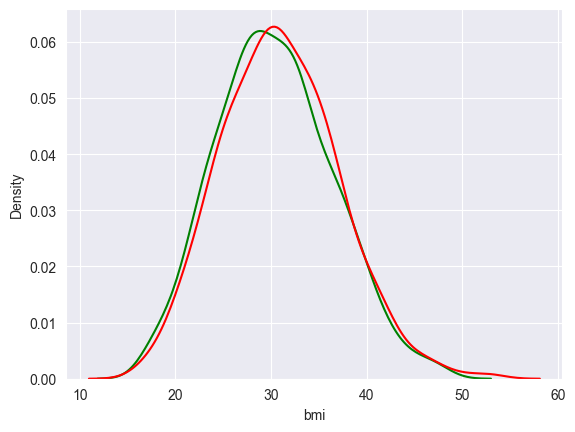

In [7]:
sns.distplot(f_bmi,color='green',hist=False)
sns.distplot(m_bmi,color='red',hist=False)

In [8]:
alpha = .05
t_value1, p_value1 = stats.ttest_ind(m_bmi, f_bmi)
print("t_value1 = ",t_value1, ", p_value1 = ", p_value1)

t_value1 =  1.696752635752224 , p_value1 =  0.08997637178984934


In [9]:
if p_value1 <alpha:
    print("Conclusion: since p_value {} is less than alpha {} ". format (p_value1,alpha))
    print("Reject the null hypothesis that there is no difference between bmi of females and bmi of males.")

else:
    print("Conclusion: since p_value {} is greater than alpha {} ". format (p_value1,alpha))
    print("Fail to reject the null hypothesis that there is a difference between bmi of females and bmi of males.")

Conclusion: since p_value 0.08997637178984934 is greater than alpha 0.05 
Fail to reject the null hypothesis that there is a difference between bmi of females and bmi of males.


In [13]:
smoker = data.loc[data.smoker=="yes"]
smoker_char = smoker.charges
sch_mean = smoker_char.mean()
sch_mean

32050.23183153284

In [15]:
nonsmoker = data.loc[data.smoker=="no"]
nonsmoker_char = nonsmoker.charges
nsch_mean = nonsmoker_char.mean()
nsch_mean

8434.268297856204

[Text(0.5, 1.0, 'Fig:1 Smoker vs Charges')]

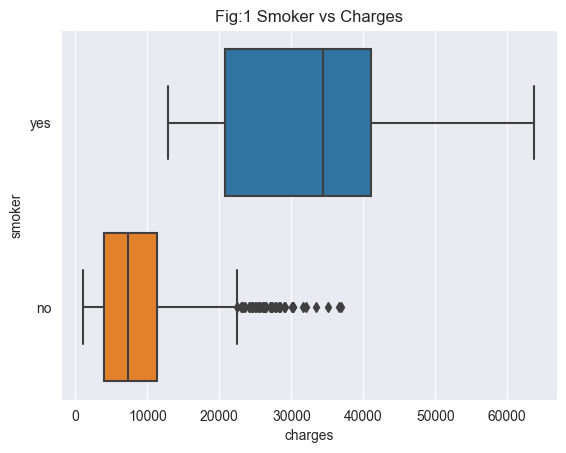

In [16]:
sns.boxplot(x=data.charges,y=data.smoker,data=data).set(title="Fig:1 Smoker vs Charges")

In [17]:
alpha=0.05
t_val2, p_value2 = stats.ttest_ind(smoker_char, nonsmoker_char)
p_value_onetail=p_value2/2
print("t_value = {} , p_value ={} , p_value_onetail = {}".format(t_val2, p_value2, p_value_onetail))

t_value = 46.66492117272371 , p_value =8.271435842179102e-283 , p_value_onetail = 4.135717921089551e-283


In [18]:
if p_value2 <alpha :
    print("Conclusion:Since p_value {} is less than alpha {} ".format (p_value_onetail,alpha) )
    print("Reject null hypothesis that average charges for smokers are less than or equal to nonsmokers.")
else:
    print("Conclusion:Since p value {} is greater than alpha {} ".format (p_value_onetail,alpha))
    print("Failed to reject null hypothesis that average charges for smokers are less than nonsmoker.")

Conclusion:Since p_value 4.135717921089551e-283 is less than alpha 0.05 
Reject null hypothesis that average charges for smokers are less than or equal to nonsmokers.


In [19]:
female_children = female.loc[female['children']<=2]

In [20]:
female_children.groupby([female_children.children]).mean().bmi

C:\Users\User\AppData\Local\Temp\ipykernel_4488\268570735.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  female_children.groupby([female_children.children]).mean().bmi


children
0    30.361522
1    30.052658
2    30.649790
Name: bmi, dtype: float64

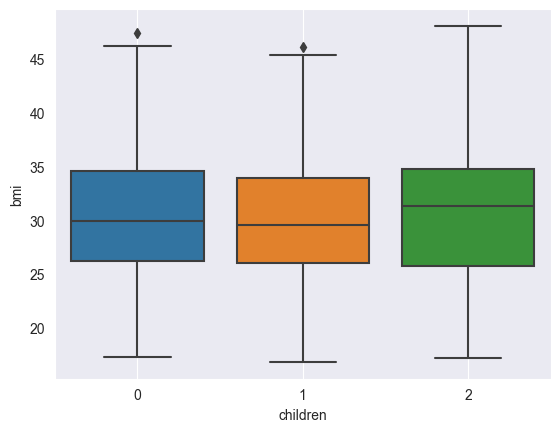

In [22]:
sns.boxplot(x="children", y="bmi", data=female_children)
plt.grid()
plt.show()

In [23]:
contingency= pd.crosstab(data.region, data.smoker)
contingency

smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


<AxesSubplot: xlabel='region'>

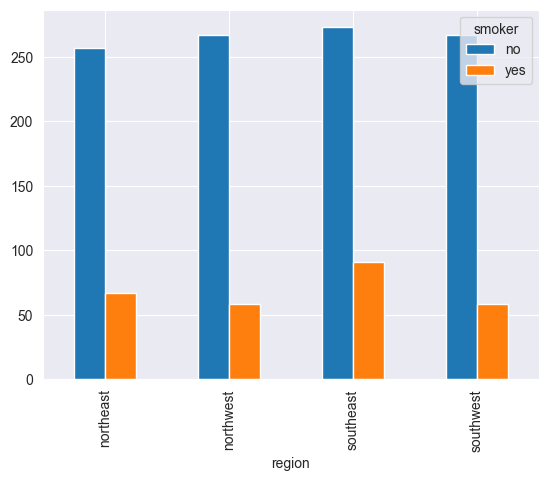

In [24]:
contingency.plot(kind='bar')

In [25]:
chi2, p_val, dof, exp_freq = chi2_contingency(contingency, correction = False)
print('chi-square statistic: {} , p_value: {} , degree of freedom: {} ,expected frequencies: {} '.format(chi2, p_val, dof, exp_freq))

chi-square statistic: 7.343477761407071 , p_value: 0.06171954839170541 , degree of freedom: 3 ,expected frequencies: [[257.65022422  66.34977578]
 [258.44544096  66.55455904]
 [289.45889387  74.54110613]
 [258.44544096  66.55455904]] 


In [27]:
if p_val < 0.05:
    print("Reject the null hypothesis, that the smokers proportions are not significantly different across the different regions")
else:
    print("Accept the null hypothesis, that the smokers proportions are not significantly different across the different regions")

Accept the null hypothesis, that the smokers proportions are not significantly different across the different regions
